In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop

,N,P,K,temperature,humidity,pH,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
crop["label"].nunique()

22

In [4]:
crop["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
pH             0
rainfall       0
label          0
dtype: int64

In [7]:
Q1 = crop.quantile(0.25)
Q3 = crop.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
crop_filtered = crop[~((crop < lower_bound) | (crop > upper_bound)).any(axis=1)]

<ipython-input-7-b7efdcae2eab>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = crop.quantile(0.25)
<ipython-input-7-b7efdcae2eab>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = crop.quantile(0.75)
<ipython-input-7-b7efdcae2eab>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  crop_filtered = crop[~((crop < lower_bound) | (crop > upper_bound)).any(axis=1)]


In [8]:
corr_matrix=crop.corr()
corr_matrix

<ipython-input-8-519bdc00c462>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=crop.corr()


,N,P,K,temperature,humidity,pH,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

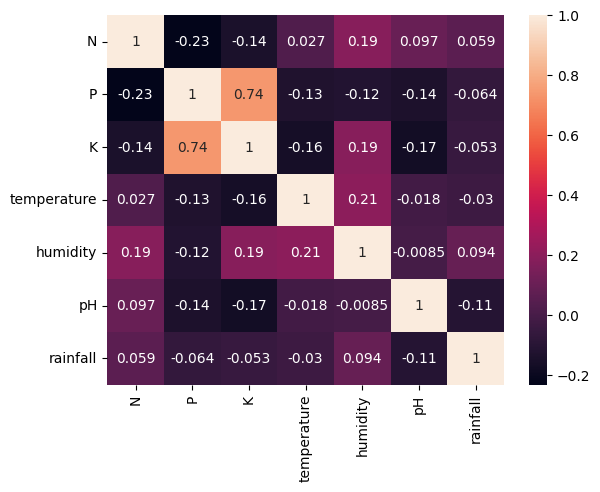

In [9]:
sns.heatmap(corr_matrix, annot=True)

In [10]:
crop_filtered

,N,P,K,temperature,humidity,pH,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
crop_filtered["crop_name"]=crop_filtered["label"]
crop_filtered.label = l.fit_transform(crop_filtered.label)
crop_filtered

<ipython-input-11-726efc0f8a9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered["crop_name"]=crop_filtered["label"]
<ipython-input-11-726efc0f8a9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered.label = l.fit_transform(crop_filtered.label)


,N,P,K,temperature,humidity,pH,rainfall,label,crop_name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,18,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,18,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,18,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,18,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,18,rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,4,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,4,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,4,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,4,coffee


In [12]:
dict_crop_name = {
    0: "Banana", 1: "Blackgram" , 2: "Chikpea" , 3: "Coconut" , 4: "Coffee" , 5 : "Cotton" ,
    6 : "Jute" , 7: "Kidney Beans" , 8: "Lentil" , 9: "Maize", 10: " Mango",11: "Moth Beans" ,12: "Mung Beans" ,13:"Musk Melons" ,
    14 : "Orange" ,15: "Papaya" , 16: "Pigeon Peas",17: "Pomegranate",18:"Rice",19:"Watermelon"}

In [13]:
import pickle
with open('crop_label_dict.pkl', 'wb') as file:
    pickle.dump(dict_crop_name, file)

In [14]:
crop_filtered.sort_values(by="label",ascending=True,inplace=True)

<ipython-input-14-e2b3b7c5b94b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered.sort_values(by="label",ascending=True,inplace=True)


In [15]:
crop_filtered.reset_index(inplace=True)

In [16]:
crop_filtered

,index,N,P,K,temperature,humidity,pH,rainfall,label,crop_name
0,1035,116,71,47,27.572781,82.063888,6.435786,91.342765,0,banana
1,1027,117,76,47,25.562022,77.382290,6.119216,93.102472,0,banana
2,1028,111,87,48,26.398551,81.360289,5.571401,98.167520,0,banana
3,1029,89,83,47,28.095776,77.795868,5.631272,109.540861,0,banana
4,1030,93,91,47,27.847679,83.311108,6.101242,117.287891,0,banana
...,...,...,...,...,...,...,...,...,...,...
1763,1370,97,22,50,26.260287,86.145859,6.769894,58.978788,19,watermelon
1764,1371,117,30,50,24.901239,87.207729,6.744966,46.592073,19,watermelon
1765,1372,90,14,52,24.847408,89.204546,6.391858,59.679272,19,watermelon
1766,1362,111,6,53,26.493064,88.591431,6.313513,46.063822,19,watermelon


In [17]:
crop_filtered.drop('index',axis = 1,inplace=True)
crop_filtered

<ipython-input-17-17df59febda3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered.drop('index',axis = 1,inplace=True)


,N,P,K,temperature,humidity,pH,rainfall,label,crop_name
0,116,71,47,27.572781,82.063888,6.435786,91.342765,0,banana
1,117,76,47,25.562022,77.382290,6.119216,93.102472,0,banana
2,111,87,48,26.398551,81.360289,5.571401,98.167520,0,banana
3,89,83,47,28.095776,77.795868,5.631272,109.540861,0,banana
4,93,91,47,27.847679,83.311108,6.101242,117.287891,0,banana
...,...,...,...,...,...,...,...,...,...
1763,97,22,50,26.260287,86.145859,6.769894,58.978788,19,watermelon
1764,117,30,50,24.901239,87.207729,6.744966,46.592073,19,watermelon
1765,90,14,52,24.847408,89.204546,6.391858,59.679272,19,watermelon
1766,111,6,53,26.493064,88.591431,6.313513,46.063822,19,watermelon


In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = crop_filtered.drop(['label','crop_name'],axis=1)
y = crop_filtered['crop_name']


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [20]:
scale=MinMaxScaler()
X_train_normalized=scale.fit_transform(X_train)
X_test_normalized=scale.fit_transform(X_test)

In [21]:
print(X_train_normalized)

[[0.02857143 0.21111111 0.475      ... 0.85953208 0.71530039 0.4642022 ]
 [0.43571429 0.43333333 0.15       ... 0.66272732 0.64311144 0.42483653]
 [0.27857143 0.21111111 0.1125     ... 0.89221327 0.71253828 0.44453653]
 ...
 [0.20714286 0.57777778 0.1875     ... 0.41527667 0.35875292 0.17179455]
 [0.4        0.68888889 0.9125     ... 0.01142552 1.         0.29826141]
 [0.01428571 0.56666667 0.225      ... 0.52281157 0.80982401 0.0865012 ]]


In [22]:
print(X_test_normalized)

[[0.4028777  0.57777778 0.5375     ... 0.94239035 0.51630208 0.22420607]
 [0.13669065 0.21111111 0.125      ... 0.95064538 0.68270071 0.47484216]
 [0.         0.66666667 0.125      ... 0.09015795 0.28933988 0.39168961]
 ...
 [0.41007194 0.57777778 0.875      ... 0.02949233 0.85355214 0.34715168]
 [0.72661871 0.08888889 0.6125     ... 0.81870896 0.6014406  0.18635824]
 [0.16546763 0.21111111 0.3375     ... 0.37022493 0.28543298 0.37848608]]


{'whiskers': [<matplotlib.lines.Line2D at 0x7cc4c65d7100>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc4c65d7640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc4c65d6e60>,
 'medians': [<matplotlib.lines.Line2D at 0x7cc4c65d7b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cc4c65d7e20>,
 'means': []}

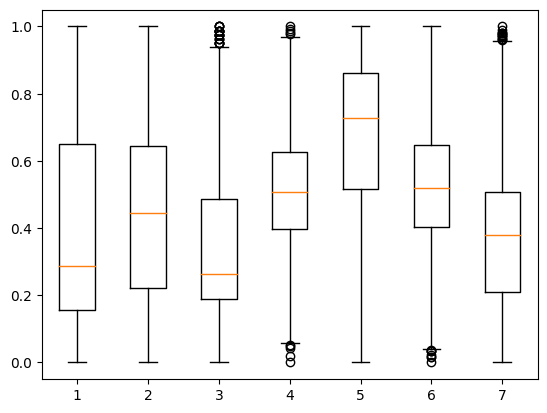

In [23]:
plt.boxplot(X_train_normalized)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc4c64f0e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc4c64f1390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc4c64f0bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7cc4c64f18d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cc4c64f1b70>,
 'means': []}

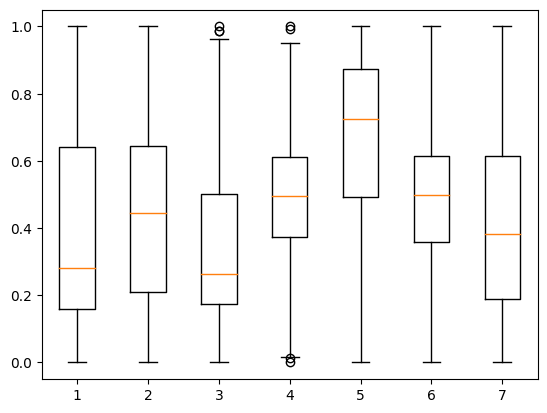

In [24]:
plt.boxplot(X_test_normalized)

In [25]:
print(X_train_normalized.shape)
print(y_train.shape)


(1414, 7)
(1414,)


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model = MLPClassifier(hidden_layer_sizes=(32,), max_iter=50, random_state=42)
model.fit(X_train_normalized, y_train)
predictions = model.predict(X_test)
print(predictions)
train_accuracy = accuracy_score(y_train, model.predict(X_train_normalized))
test_accuracy = accuracy_score(y_test, predictions)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")



['jute' 'coconut' 'pigeonpeas' 'pigeonpeas' 'coconut' 'coffee' 'coconut'
 'coconut' 'banana' 'coffee' 'banana' 'coconut' 'pigeonpeas' 'coffee'
 'pigeonpeas' 'banana' 'coffee' 'coffee' 'coconut' 'banana' 'pigeonpeas'
 'coconut' 'coffee' 'coffee' 'coconut' 'coffee' 'coffee' 'coffee' 'banana'
 'jute' 'coffee' 'banana' 'banana' 'coffee' 'coffee' 'jute' 'banana'
 'coconut' 'coffee' 'coconut' 'coffee' 'jute' 'coffee' 'coffee' 'banana'
 'coconut' 'banana' 'coffee' 'coffee' 'coffee' 'coconut' 'coffee' 'coffee'
 'coconut' 'banana' 'jute' 'pigeonpeas' 'coconut' 'muskmelon' 'jute'
 'banana' 'coconut' 'coconut' 'jute' 'coconut' 'coconut' 'coffee' 'coffee'
 'pigeonpeas' 'coconut' 'banana' 'coffee' 'coffee' 'coffee' 'coconut'
 'coconut' 'coconut' 'coconut' 'coffee' 'jute' 'banana' 'pigeonpeas'
 'coconut' 'coconut' 'banana' 'coffee' 'banana' 'coffee' 'coffee' 'jute'
 'coffee' 'coffee' 'jute' 'coconut' 'coffee' 'banana' 'banana' 'coffee'
 'coconut' 'coconut' 'coffee' 'jute' 'coffee' 'coconut' 'coffee'

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [27]:
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(hidden_layer_sizes=(64,),activation='relu' ,max_iter=1000, alpha=1e-6,
                    solver='adam', verbose=2, random_state=1,
                    learning_rate_init=0.0001)
scores = cross_val_score(clf, X, y, cv=5)
print("Mean cross-validation score:", scores.mean())
clf.fit(X, y)
with open('mlp_classifier_with_cv.pkl', 'wb') as file:
    pickle.dump(clf, file)
predictions = clf.predict(X_test)
print(predictions)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {test_accuracy}")

Iteration 1, loss = 32.89879230
Iteration 2, loss = 32.62478559
Iteration 3, loss = 32.30552356
Iteration 4, loss = 31.95513748
Iteration 5, loss = 31.57157009
Iteration 6, loss = 31.18750578
Iteration 7, loss = 30.80342003
Iteration 8, loss = 30.41882652
Iteration 9, loss = 30.03443220
Iteration 10, loss = 29.64493745
Iteration 11, loss = 29.24438654
Iteration 12, loss = 28.80263997
Iteration 13, loss = 28.31478176
Iteration 14, loss = 27.79756285
Iteration 15, loss = 27.24924458
Iteration 16, loss = 26.69689987
Iteration 17, loss = 26.13714053
Iteration 18, loss = 25.55591665
Iteration 19, loss = 24.97871410
Iteration 20, loss = 24.40148221
Iteration 21, loss = 23.81504115
Iteration 22, loss = 23.26654188
Iteration 23, loss = 22.73791587
Iteration 24, loss = 22.20749036
Iteration 25, loss = 21.69587411
Iteration 26, loss = 21.17265056
Iteration 27, loss = 20.62437119
Iteration 28, loss = 20.03694500
Iteration 29, loss = 19.42234344
Iteration 30, loss = 18.78567322
Iteration 31, loss 

In [33]:
from joblib import load
model = load('mlp_classifier_with_cv.pkl')


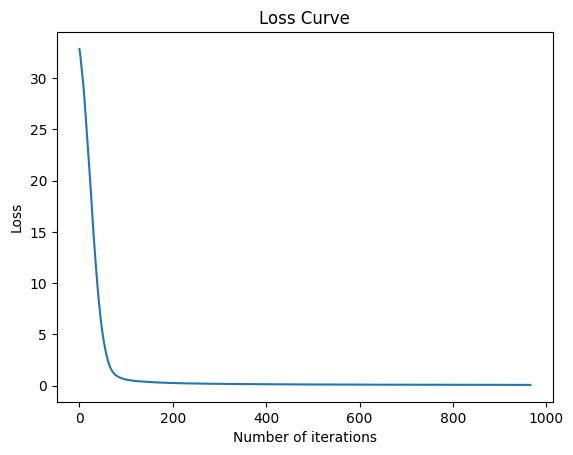

0.07580211535962415


In [28]:
plt.plot(clf.loss_curve_)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()
min_loss=min(clf.loss_curve_)
print(min_loss)

In [29]:
data = np.array([[60,55,44,23.0045,32,7.8,263]])
prediction = clf.predict(data)
print(prediction)

['jute']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


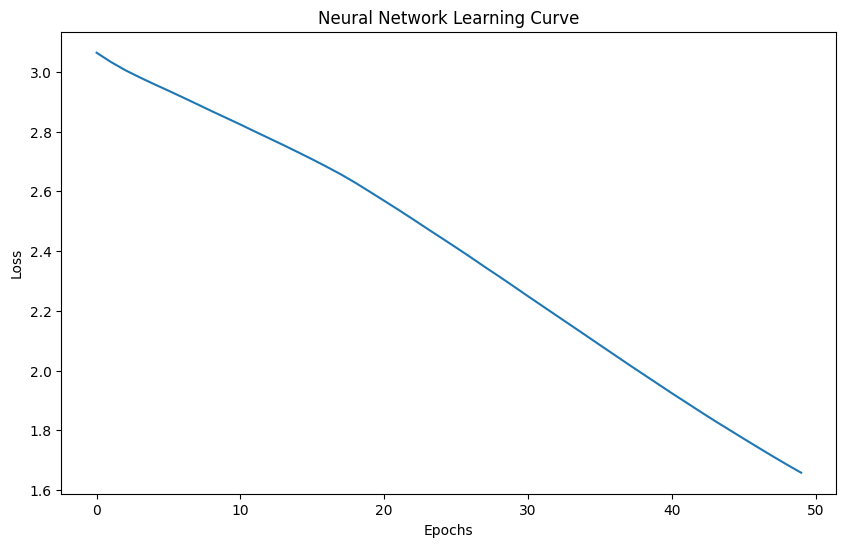

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_)
plt.title('Neural Network Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

<ipython-input-31-294271e2dbf8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = accuracy_scores,y = model_names,palette='dark')


<Axes: title={'center': 'Accuracy Comparision'}, xlabel='accuracy_scores', ylabel='model_names'>

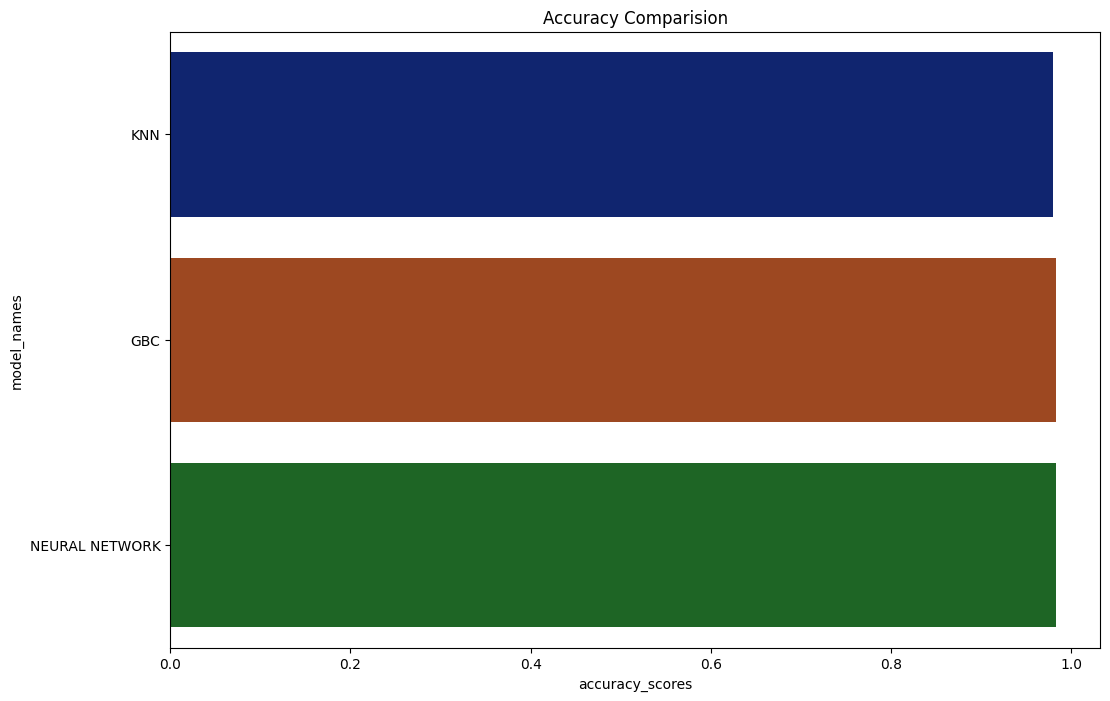

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample accuracy scores (replace this with your actual accuracy scores)
accuracy_scores = [0.98,0.9825,0.9830]

# Labels for the bars
model_names = ['KNN', 'GBC','NEURAL NETWORK']

plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('accuracy_scores')
plt.ylabel('model_names')
sns.barplot(x = accuracy_scores,y = model_names,palette='dark')




In [32]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful